In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

df = pd.read_csv('metadata.csv')

In [88]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'Path'
    df = df.drop(columns=['Path'])
    # Drop column: 'Other_species30'
    df = df.drop(columns=['Other_species30'])
    # Drop column: 'Other_species28'
    df = df.drop(columns=['Other_species28'])
    # Drop column: 'Other_species29'
    df = df.drop(columns=['Other_species29'])
    # Drop column: 'Other_species27'
    df = df.drop(columns=['Other_species27'])
    # Drop column: 'Other_species26'
    df = df.drop(columns=['Other_species26'])
    # Drop column: 'Other_species25'
    df = df.drop(columns=['Other_species25'])
    # Drop column: 'Other_species24'
    df = df.drop(columns=['Other_species24'])
    # Drop column: 'Other_species23'
    df = df.drop(columns=['Other_species23'])
    # Drop column: 'Remarks'
    df = df.drop(columns=['Remarks'])
    # Drop column: 'Spectrogram_full'
    df = df.drop(columns=['Spectrogram_full'])
    # Drop column: 'Spectrogram_large'
    df = df.drop(columns=['Spectrogram_large'])
    # Drop column: 'Spectrogram_med'
    df = df.drop(columns=['Spectrogram_med'])
    # Drop column: 'Spectrogram_small'
    df = df.drop(columns=['Spectrogram_small'])
    # Drop column: 'file.name'
    df = df.drop(columns=['file.name'])
    # Convert Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Replace all instances of "?" with "" in column: 'Altitude'
    df['Altitude'] = df['Altitude'].replace(to_replace='?', value=np.nan)
    # Replace all instances of "" with "" in column: 'Time'
    df['Time'] = df['Time'].replace(to_replace='?', value=np.nan)
    # Ensure 'Altitude' and are numeric, coerce errors to NaN
    df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')
    # Drop rows with missing data in column: 'Date'
    df = df.dropna(subset=['Date','Altitude'])
    # Drop column: 'Url'
    df = df.drop(columns=['Url'])
    # Drop column: 'License'
    df = df.drop(columns=['License'])
    # Drop column: 'Audio_file'
    df = df.drop(columns=['Audio_file'])
    # Capitalize the first character in column: 'Locality'
    df['Locality'] = df['Locality'].str.title()
    return df

df_clean = clean_data(df.copy())
df = df_clean

# Convert Length from "minutes:seconds" format to total seconds
def convert_to_seconds(length):
    try:
        minutes, seconds = map(int, length.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return np.nan  # Handle invalid formats as NaN
    
df['Length_seconds'] = df['Length'].apply(convert_to_seconds)

df['Time'] = df['Time'].astype(str)

def convert_time_to_minutes(time_str):
    try:
        if ':' in time_str:
            hours, minutes = map(int, time_str.split(':'))
            return hours * 60 + minutes
        else:
            return np.nan  # Return NaN if the format is not as expected
    except (ValueError, AttributeError):
        return np.nan

df['Time_minutes'] = df['Time'].apply(convert_time_to_minutes)

In [89]:
# Data preparation for clustering
features = ['Length_seconds', 'Quality', 'Altitude', 'Species']
df_clean = df[features].dropna()

label_encoder = LabelEncoder()
df_clean['Quality_encoded'] = label_encoder.fit_transform(df_clean['Quality'])
df_clean['Species_encoded'] = label_encoder.fit_transform(df_clean['Species'])

X = df_clean[['Length_seconds', 'Quality_encoded', 'Altitude', 'Species_encoded']]

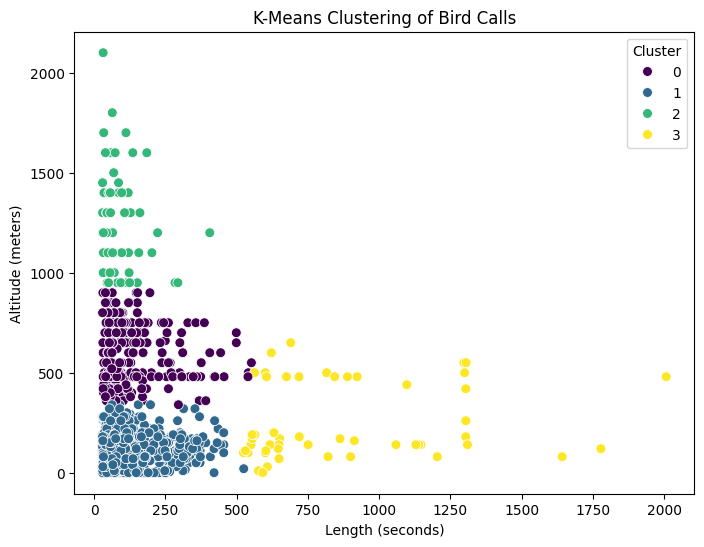

In [ ]:

# K Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clean['KMeans_Cluster'] = kmeans.fit_predict(X)

# Visualization: K-Means Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_clean['Length_seconds'],
    y=df_clean['Altitude'],
    hue=df_clean['KMeans_Cluster'], 
    palette='viridis', 
    s=50
)

plt.title('K-Means Clustering of Bird Calls')
plt.xlabel('Length (seconds)')
plt.ylabel('Altitude (meters)')
plt.legend(title='Cluster')
plt.show()

print("Cluster assignments using KMeans:")
print(df_clean['KMeans_Cluster'].value_counts())

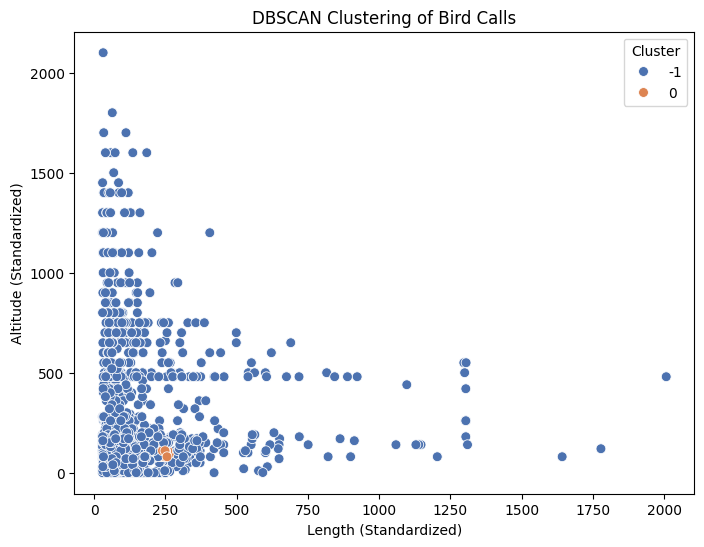

In [91]:
from sklearn.cluster import OPTICS

# OTPICS Clustering

optics = OPTICS(min_samples=50,metric='manhattan')
df_clean['OPTICS_Cluster'] = optics.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Length_seconds'], y=X['Altitude'], hue=df_clean['OPTICS_Cluster'], palette='deep', s=50)
plt.title('OPTISCAN Clustering of Bird Calls')
plt.xlabel('Length (Standardized)')
plt.ylabel('Altitude (Standardized)')
plt.legend(title='Cluster')
plt.show()


print("Cluster assignments using OPTISCAN:")
print(df_clean['OPTICS_Cluster'].value_counts())

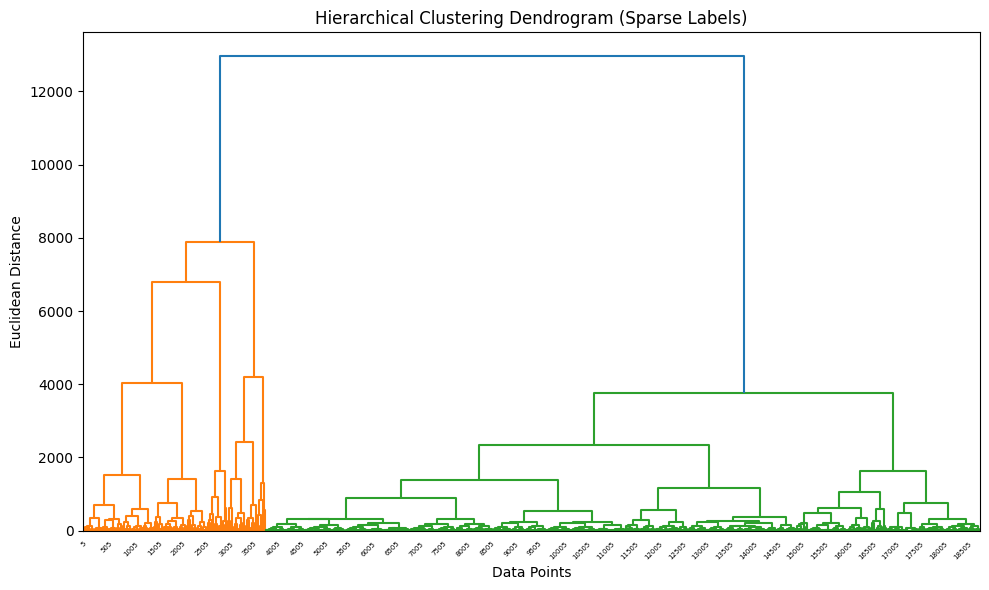

In [97]:
# Hierarchical Clustering
linked = linkage(X, method='ward')

# Visualization: Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    truncate_mode='level',  
    p=15 
)


ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks[::50])  
ax.set_xticklabels(xticks[::50], rotation=45)

plt.title('Hierarchical Clustering Dendrogram (Sparse Labels)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()
